# Tutorial for fitting uranium resonances using `pleiades`
Tsviki Y. Hirsh and Alex Long

July 9th 2024

This is a notebook to guide a pleiades user to fitting a neutron transmission spectrum of uranium isotopes. For this tutorial we will be using the simulated data set `u235-u238.twenty` in `examples/data/`

##### import the needed libraries from pleiades

In [43]:
from pleiades import sammyUtils, sammyPlotter

### Loading a config file for SAMMY fitting

We have a uranium.ini file that contains many of the parameters that we 

In [44]:
# Load the configuration file from the ini file in the parent directory
uranium = sammyUtils.SammyFitConfig('uranium.ini')

#### What happend:
Pleiades has now created a couple of directories base on the keys and vlaues under ['directories'] in makeCompoundFit_Eu.in

Given that sammy needs to use ascii files to run, and also generates additional files that need to be parsed. We have to create a directory that contains all the needed subfolders to configure, execute, and interpret sammy runs. This is done by creating a archive_dir, which can be set in the makeCompoundFit_Eu.ini config file. If none is given then it defualts to ".archive"

Currently nothing is stored in these directories, but we will start filling them with sammy files. i

In [45]:
!ls -lah .archive/

total 16K
drwxr-xr-x 4 l280162 l280162 4.0K Jul  9 16:03 .
drwxr-xr-x 4 l280162 l280162 4.0K Jul  9 16:03 ..
drwxr-xr-x 4 l280162 l280162 4.0K Jul  9 16:03 endf
drwxr-xr-x 3 l280162 l280162 4.0K Jul  9 16:10 u235-u238


#### Now Create the needed parFiles from ENDF for the Eu isotopes

Here we are using the create_parFile_from_endf() funtion with the natEu SammyFitConfig object to create the needed parFiles for each of the Eu isotopes list in the makeCompoundFit_Eu.ini file. 

Note: You can change the print verbose level to print out important variables and paths. 

In [46]:
# Create the needed parFiles from ENDF for the isotopes in the configuration file
sammyUtils.create_parFile_from_endf(uranium,verbose_level=0)

#### <span style="color:red">What happend:</span> 

Pleiades configured two SAMMY runs to generate the needed resonance parameters for the final SAMMY fit. These ENDF SAMMY runs are stored in the 'endf_dir' which is set in makeCompoundFit_Eu.ini

If you `ls` the .archive/endf directory, you will see two sub-dirs: Eu151 & Eu153. Each of these folders contains the results for running SAMMY to generate SAMNDF.PAR files for each respective isotope.

In [47]:
!ls -lah .archive/endf

total 16K
drwxr-xr-x 4 l280162 l280162 4.0K Jul  9 16:03 .
drwxr-xr-x 4 l280162 l280162 4.0K Jul  9 16:03 ..
drwxr-xr-x 3 l280162 l280162 4.0K Jul  9 16:19 U235
drwxr-xr-x 3 l280162 l280162 4.0K Jul  9 16:19 U238


#### Configure SAMMY for the fit of Natural Eu

Now that we have the needed SAMNDF.PAR files for each isotope (stored in the .archive/endf/Eu15* folders) we can configure all the needed SAMMY files to fit a naterual Eu transmission spectrum. 

The data for this is stored in `examples/data` and the path is set in makeCompoundFit_Eu.ini as `data_dir = "../data"`

In [48]:
# Configure the sammy run, this will create a compound parFile. 
sammyUtils.configure_sammy_run(uranium,verbose_level=1)

Creating SAMMY parFile files for isotopes: ['U-235', 'U-238'] with abundances: [0.01, 0.01]
Writing output parFile: /home/l280162/Programs/PLEIADES/examples/Notebooks/.archive/u235-u238/params.par
Creating SAMMY inpFile files for isotopes: ['U-235', 'U-238'] with abundances: [0.01, 0.01]
No config file given. Using default parameters.
Created compound input file: /home/l280162/Programs/PLEIADES/examples/Notebooks/.archive/u235-u238/input.inp


##### <span style="color:red">What happend:</span> 

Here Pleiades has taken all the needed information from the two (Eu151, Eu153) `SAMNDF.PAR` files and combined them to form a `params.par` file. Additionally Pleiades has created the needed input.inp file to run the natEu SAMMY fit.  

#### running the SAMMY of Natural Eu

Now that everything is set we are prepared to run the actual fit on the natural Eu data. 
Note: You can change the print verbose level to print out important variables and paths. 

In [49]:
# Run the sammy fit.
sammyUtils.run_sammy(uranium,verbose_level=1)

Running SAMMY for /home/l280162/Programs/PLEIADES/examples/Notebooks/.archive/u235-u238
Output file: /home/l280162/Programs/PLEIADES/examples/Notebooks/.archive/u235-u238/output.out
Running SAMMY for u235-u238...


##### <span style="color:red">What happend:</span> 

Here we

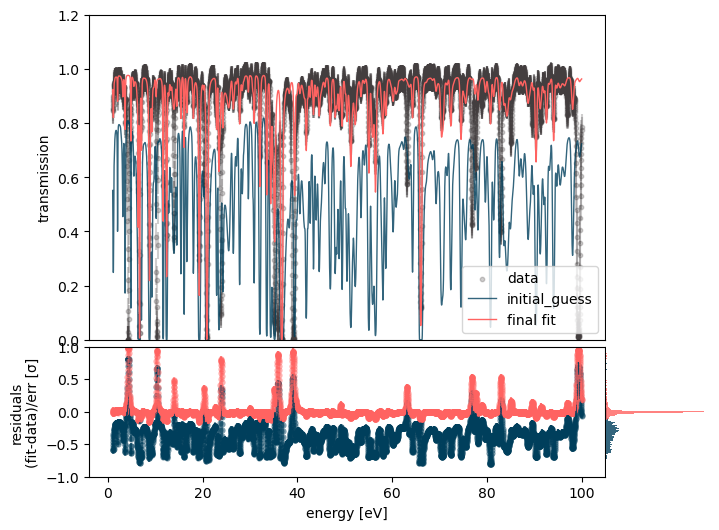

In [50]:
# Plot the results
sammyPlotter.process_and_plot_lst_file(uranium.params['directories']['sammy_fit_dir']+"/results/SAMMY.LST", residual=True,quantity='transmission')